<a href="https://colab.research.google.com/github/deepskies/SimplePhysicalImage/blob/master/Lensing_Simulations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install numpy
!pip install matplotlib
!pip install bokeh
!pip install keras

# Create Methods for Structure Creation

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge, Rectangle
from matplotlib.path import Path
from bokeh.plotting import figure, show, output_notebook, gridplot

output_notebook()


def _patch2im(thepatch, imshape):
    # Create meshgrid of coordinates
    y = np.arange(1, imshape[0])
    x = np.arange(1, imshape[1])
    g = np.meshgrid(x, y)

    coords = np.array(list(zip(*(c.flat for c in g))))

    # Create path
    elpath = Path(thepatch.get_verts())

    # Determine all points in the grid ithat are in the path.
    validcoords = elpath.contains_points(coords)
    ellipsepoints = coords[validcoords]

    outim = np.zeros(imshape)
    outim[ellipsepoints[:, 0], ellipsepoints[:, 1]] = 1

    return outim


def create_polygon(imshape, xy, width, height, angle=0.0, fill=True):

    # Create the arc patch we want to add to the image
    rect = Rectangle(xy, width, height, angle=0.0, fill=fill)

    return _patch2im(rect, imshape)


def create_circle(imshape, center, radius, width):
    """
    Create a cirlce.
    """

    # Create the arc patch we want to add to the image
    return create_arc(imshape, center, radius, width=width, theta1=0, theta2=360)
  
def create_line(imshape, center, radius, width):
    """
    Create a cirlce.
    """

    # Create the arc patch we want to add to the image
    # return create_line(imshape, center, radius, width=width, theta1=0, theta2=359)


def create_arc(imshape, center, radius, width, theta1, theta2):
    """
    Create an arc (outline of a circle) with a specified
    thickness (width).
    """

    # Create the arc patch we want to add to the image
    arc = Wedge(center, radius, theta1, theta2, width)

    return _patch2im(arc, imshape)




# Create an Example Lensing Image

In [0]:

imblah = np.zeros((256, 256))

# Example arc
arc = create_arc(imblah.shape, center=(150, 128), radius=56, width=6, theta1=27, theta2=156)
imblah += arc * 35

# Example filled circle
circle = create_circle(imblah.shape, center=(50, 28), radius=56, width=56)
imblah += circle * 21

# Example unfilled circle
circle = create_circle(imblah.shape, center=(28, 200), radius=50, width=8)
imblah += circle * 61

# Example polygon
rect = create_polygon(imblah.shape, (150, 28), width=27, height=44)
imblah += rect * 13



In [0]:
p = figure(x_range=(1, 256), y_range=(1, 256))

# must give a vector of image data for image parameter
p.image(image=[imblah], x=1, y=1, dw=256, dh=256, palette="Spectral11")

output_notebook()

show(p)  # open a browser

# Plot the Example Lensing Image Using Bokeh
Because I can...

In [0]:
p = figure(x_range=(1, 256), y_range=(1, 256))

# must give a vector of image data for image parameter
p.image(image=[imblah], x=1, y=1, dw=256, dh=256, palette="Spectral11")

output_notebook()

show(p)  # open a browser

Loading BokehJS ...

# Example of Shifted Lensing

## Create Positive Examples

In [0]:
# Positive examples

nb_sample = 100


figures = []
lensing_images_pos = []


# for coord in zip(np.random.randint(32, 32, nb_sample), np.random.randint(130, 150, nb_sample)):
for ii in np.arange(nb_sample):

  imblah = np.zeros((64, 64, 3))

  # Example filled circle
  circle = create_circle(imblah.shape[:2], center=(32, 32), radius=10, width=10)
  imblah += np.dstack([circle.astype(np.uint8)]*3) * np.array([200, 34, 64], dtype=np.uint8)

  # Example arc
  theta_mean = np.random.randint(0,360)
  theta_width = np.random.randint(1,220)
  theta1 = theta_mean - theta_width / 2.
  theta2 = theta_mean + theta_width / 2.
  arc = create_arc(imblah.shape[:2], center=(32,32), radius=np.random.randint(20, 30), width=6, theta1=theta1, theta2=theta2)
  imblah += np.dstack([arc.astype(np.uint8)]*3) * np.array([34, 64, 200], dtype=np.uint8)

  lensing_images_pos.append(imblah)
  
  #p = figure(x_range=(1, 64), y_range=(1, 64), plot_width=128, plot_height=128)

  # must give a vector of image data for image parameter
  #p.image(image=[imblah], x=1, y=1, dw=64, dh=64, palette="Spectral11")

  #figures.append(p)
  
#output_notebook()

#show(gridplot([figures[:3], figures[3:6], figures[6:]]))

lensing_labels_pos = np.ones(len(lensing_images_pos))
print(len(lensing_images_pos))


100


## Create Negative Examples

In [0]:
# Negative examples

figures = []
lensing_images_neg = []


# for coord in zip(np.random.randint(32, 32, nb_sample), np.random.randint(130, 150, nb_sample)):
for ii in np.arange(nb_sample):

  imblah = np.zeros((64, 64, 3))

  # Example filled circle
  circle = create_circle(imblah.shape[:2], center=(32, 32), radius=10, width=10)
  imblah += np.dstack([circle.astype(np.uint8)]*3) * np.array([200, 34, 64], dtype=np.uint8)

  # Example arc
  theta_mean = np.random.randint(0,360)
  theta_width = np.random.randint(1,220)
  theta1 = theta_mean - theta_width / 2.
  theta2 = theta_mean + theta_width / 2.
  #arc = create_arc(imblah.shape[:2], center=(32,32), radius=np.random.randint(20, 30), width=6, theta1=theta1, theta2=theta2)
  #imblah += np.dstack([arc.astype(np.uint8)]*3) * np.array([34, 64, 200], dtype=np.uint8)

  lensing_images_neg.append(imblah)
  
  # p = figure(x_range=(1, 64), y_range=(1, 64), plot_width=128, plot_height=128)

  # must give a vector of image data for image parameter
  #p.image(image=[imblah], x=1, y=1, dw=64, dh=64, palette="Spectral11")

  #figures.append(p)
  
#output_notebook()

#show(gridplot([figures[:3], figures[3:6], figures[6:]]))

lensing_labels_neg = np.zeros(len(lensing_images_neg))
print(len(lensing_images_neg))


100


In [0]:
#lensing_images = lensing_images_pos + lensing_images_neg 
#lensing_labels = lensing_labels_pos + lensing_labels_neg

lensing_images = np.stack(lensing_images_pos + lensing_images_neg, axis=-1)
lensing_labels = np.concatenate((lensing_labels_pos , lensing_labels_neg))


lensing_images = np.transpose(lensing_images, (3,0,1,2))
print(lensing_images.shape, lensing_labels.shape)

(200, 64, 64, 3) (200,)


# Keras Example: Lensing


In [0]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from sklearn.model_selection import train_test_split
#This example adapted from https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py

Using TensorFlow backend.


In [0]:
# Setting some variables for the ML
batch_size = 128
num_classes = 2
epochs = 12

X = lensing_images
y = lensing_labels

# input image dimensions
img_rows, img_cols = imblah.shape[0], imblah.shape[1]

# the data, split between train and test sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)


In [0]:
# Testing for formatted shape of the images and then reshaping them

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)


# Normalising the images to make them to make classification easier
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

print('x_train shape:', x_train.shape)
print('the shape of the training data is: (num_examples, nside_x, nside_y, colour channels)')
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (100, 64, 64, 3)
the shape of the training data is: (num_examples, nside_x, nside_y, colour channels)
100 train samples
100 test samples


In [0]:
# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Pick the machine learning model you want to use to model the layers
# The Sequential model is a linear stack of layers.
model = Sequential()


model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])



In [0]:
history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 100 samples, validate on 100 samples
Epoch 1/12
100/100 [==============================] - 3s 35ms/step - loss: 0.6951 - acc: 0.4500 - val_loss: 0.4403 - val_acc: 0.9900
Epoch 2/12
100/100 [==============================] - 3s 28ms/step - loss: 0.4790 - acc: 0.7900 - val_loss: 0.3826 - val_acc: 0.8200
Epoch 3/12
100/100 [==============================] - 3s 26ms/step - loss: 0.4745 - acc: 0.7900 - val_loss: 0.9370 - val_acc: 0.5100
Epoch 4/12
100/100 [==============================] - 3s 26ms/step - loss: 0.9947 - acc: 0.4900 - val_loss: 0.2932 - val_acc: 0.9100
Epoch 5/12
100/100 [==============================] - 3s 26ms/step - loss: 0.3371 - acc: 0.8800 - val_loss: 0.2312 - val_acc: 0.9500
Epoch 6/12
100/100 [==============================] - 3s 27ms/step - loss: 0.2930 - acc: 0.8800 - val_loss: 0.1858 - val_acc: 0.9500
Epoch 7/12
100/100 [==============================] - 3s 26ms/step - loss: 0.2773 - acc: 0.8900 - val_loss: 0.1660 - val_acc: 0.9700
Epoch 8/12
100/100 [===

In [0]:
print(history.history, 'hey folks')

{'val_loss': [0.44025054574012756, 0.3825901448726654, 0.9369852542877197, 0.2932448089122772, 0.2311631590127945, 0.18580619990825653, 0.16595177352428436, 0.144161656498909, 0.12232699990272522, 0.10964975506067276, 0.10310837626457214, 0.08426427096128464], 'val_acc': [0.9900000095367432, 0.8199999928474426, 0.5099999904632568, 0.9100000262260437, 0.949999988079071, 0.949999988079071, 0.9700000286102295, 0.9700000286102295, 0.9700000286102295, 0.9800000190734863, 0.9900000095367432, 0.9800000190734863], 'loss': [0.6951392292976379, 0.4790484309196472, 0.4745144248008728, 0.9946888089179993, 0.3370739221572876, 0.29298895597457886, 0.2772583067417145, 0.22687682509422302, 0.20749539136886597, 0.20495788753032684, 0.17640440165996552, 0.14499904215335846], 'acc': [0.44999998807907104, 0.7900000214576721, 0.7900000214576721, 0.49000000953674316, 0.8799999952316284, 0.8799999952316284, 0.8899999856948853, 0.9200000166893005, 0.9300000071525574, 0.949999988079071, 0.9399999976158142, 0.9

Text(0.5,0,'Time taken to do the training task (get to work)')

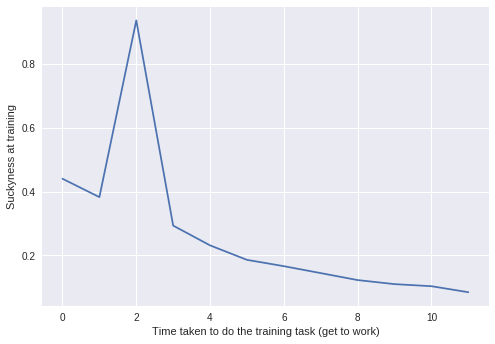

In [0]:
plt.plot(history.history['val_loss'])
plt.ylabel('Suckyness at training')
plt.xlabel('Time taken to do the training task (get to work)')